<a href="https://colab.research.google.com/github/tewei0328/trade-backtest/blob/main/%5BColab%5D%E4%B8%8B%E8%BC%89%E8%87%BA%E6%8C%87%E9%81%B8%E6%93%87%E6%AC%8A%E6%AF%8F%E6%97%A5%E4%BA%A4%E6%98%93%E8%A1%8C%E6%83%85(2023-05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Import 套件¶

In [1]:
#下載資料套件
import urllib3
from bs4 import BeautifulSoup

#資料處理套件
import pandas as pd
from datetime import datetime, date

#畫圖套件
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Part 1: 下載期交所 臺指選擇權 每日交易行情
### 股海小英雄youtube影片：[【Python 爬蟲】台指選擇權Put/Call比免費下載 (上)｜股市多空頭趨勢預測](https://youtu.be/RqodmAWC8EE)

### 資料來源：[期交所 臺指選擇權 每日交易行情](https://www.taifex.com.tw/cht/3/dlOptDailyMarketView)
注意:查詢區間不可超過30日

用urllib3下載選擇權每日交易行情資料


In [3]:
http = urllib3.PoolManager()
url = "https://www.taifex.com.tw/cht/3/dlOptDataDown"
res = http.request(
     'POST',
      url,
      fields={
         'down_type': 1,
         'commodity_id': 'TXO',
         'queryStartDate': '2023/05/02',
         'queryEndDate': '2023/05/05'
      }
 )

html_doc = res.data
html_doc

b'\xa5\xe6\xa9\xf6\xa4\xe9\xb4\xc1,\xab\xb4\xac\xf9,\xa8\xec\xb4\xc1\xa4\xeb\xa5\xf7(\xb6g\xa7O),\xbci\xac\xf9\xbb\xf9,\xb6R\xbd\xe6\xc5v,\xb6}\xbdL\xbb\xf9,\xb3\xcc\xb0\xaa\xbb\xf9,\xb3\xcc\xa7C\xbb\xf9,\xa6\xac\xbdL\xbb\xf9,\xa6\xa8\xa5\xe6\xb6q,\xb5\xb2\xba\xe2\xbb\xf9,\xa5\xbc\xa8R\xbeP\xab\xb4\xac\xf9\xbc\xc6,\xb3\xcc\xab\xe1\xb3\xcc\xa8\xce\xb6R\xbb\xf9,\xb3\xcc\xab\xe1\xb3\xcc\xa8\xce\xbd\xe6\xbb\xf9,\xbe\xfa\xa5v\xb3\xcc\xb0\xaa\xbb\xf9,\xbe\xfa\xa5v\xb3\xcc\xa7C\xbb\xf9,\xacO\xa7_\xa6]\xb0T\xae\xa7\xad\xb1\xbc\xc8\xb0\xb1\xa5\xe6\xa9\xf6,\xa5\xe6\xa9\xf6\xae\xc9\xacq,\xba\xa6\xb6^\xbb\xf9,\xba\xa6\xb6^%\r\n2023/05/02,TXO,202305W1,13800.0000,\xb6R\xc5v,-,-,-,-,0,1830,2,-,-,-,-,,\xa4@\xaf\xeb,-,-,\r\n2023/05/02,TXO,202305W1,13800.0000,\xb6R\xc5v,-,-,-,-,0,-,-,-,-,-,-,,\xbdL\xab\xe1,-,-,\r\n2023/05/02,TXO,202305W1,13800.0000,\xbd\xe6\xc5v,-,-,-,-,0,0.1,13,-,-,-,-,,\xa4@\xaf\xeb,-,-,\r\n2023/05/02,TXO,202305W1,13800.0000,\xbd\xe6\xc5v,-,-,-,-,0,-,-,-,-,-,-,,\xbdL\xab\xe1,-,-,\r\n2

用BeautifulSoup解析資料

In [4]:
soup = BeautifulSoup(html_doc, 'html.parser')
soup

交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
2023/05/02,TXO,202305W1,13800.0000,買權,-,-,-,-,0,1830,2,-,-,-,-,,一般,-,-,
2023/05/02,TXO,202305W1,13800.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2023/05/02,TXO,202305W1,13800.0000,賣權,-,-,-,-,0,0.1,13,-,-,-,-,,一般,-,-,
2023/05/02,TXO,202305W1,13800.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2023/05/02,TXO,202305W1,13900.0000,買權,-,-,-,-,0,1730,1,-,-,-,-,,一般,-,-,
2023/05/02,TXO,202305W1,13900.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2023/05/02,TXO,202305W1,13900.0000,賣權,-,-,-,-,0,0.1,111,-,-,-,-,,一般,-,-,
2023/05/02,TXO,202305W1,13900.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2023/05/02,TXO,202305W1,14000.0000,買權,-,-,-,-,0,1630,1,-,-,-,-,,一般,-,-,
2023/05/02,TXO,202305W1,14000.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2023/05/02,TXO,202305W1,14000.0000,賣權,0.2,0.4,0.2,0.4,13,0.2,130,-,0.9,1.9,0.2,,一般,0.2,100%,
2023/05/02,TXO,202305W1,14000.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2023/05/02,TXO,202305W1,14

把資料依行數切割

In [5]:
soup_str = str(soup)
lines = soup_str.split('\r\n')

for i in range(5):
    print(lines[i])
    print()

交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%

2023/05/02,TXO,202305W1,13800.0000,買權,-,-,-,-,0,1830,2,-,-,-,-,,一般,-,-,

2023/05/02,TXO,202305W1,13800.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,

2023/05/02,TXO,202305W1,13800.0000,賣權,-,-,-,-,0,0.1,13,-,-,-,-,,一般,-,-,

2023/05/02,TXO,202305W1,13800.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,



把下載的選擇權每日交易行情資料存入dataframe內

In [6]:
# 新增空的dataframe,定義欄位名稱
df = pd.DataFrame(columns = lines[0].split(','))

# 把選擇權資料一行一行寫入dataframe內
for i in range(1, len(lines) - 1):
    list_ = lines[i].split(',')[:-1]
    df_length = len(df)
    df.loc[df_length] = list_

#顯示dataframe前20行的資料    
df.head(20)

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
0,2023/05/02,TXO,202305W1,13800.0000,買權,-,-,-,-,0,1830,2,-,-,-,-,,一般,-,-
1,2023/05/02,TXO,202305W1,13800.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
2,2023/05/02,TXO,202305W1,13800.0000,賣權,-,-,-,-,0,0.1,13,-,-,-,-,,一般,-,-
3,2023/05/02,TXO,202305W1,13800.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
4,2023/05/02,TXO,202305W1,13900.0000,買權,-,-,-,-,0,1730,1,-,-,-,-,,一般,-,-
5,2023/05/02,TXO,202305W1,13900.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
6,2023/05/02,TXO,202305W1,13900.0000,賣權,-,-,-,-,0,0.1,111,-,-,-,-,,一般,-,-
7,2023/05/02,TXO,202305W1,13900.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
8,2023/05/02,TXO,202305W1,14000.0000,買權,-,-,-,-,0,1630,1,-,-,-,-,,一般,-,-
9,2023/05/02,TXO,202305W1,14000.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-


# Part 2: 將下載的臺指選擇權 每日交易行情 另存csv檔到本機

In [7]:
from google.colab import files
df.to_csv('options.csv') 
files.download('options.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section

#Part 3: 畫出臺指選擇權每日交易行情
### 資料轉型：把日期從字串(string)換成時間(datetime)/浮點數(float)

In [8]:
# 資料轉型
for col in [0, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    for row in range(df.shape[0]):
        # 把"日期"從字串(string)換成時間(datetime)
        if col == 0:
            day = df.iloc[row,0].split('/')
            df.iloc[row, 0] = datetime(int(day[0]), int(day[1]), int(day[2]))  
        # 把字串(string)換成浮點數(float): "履約價", "開盤價", "最高價", "最低價", "收盤價", "成交量", "結算價", "未沖銷契約數", "最後最佳買價", "最後最佳賣價", "歷史最高價", "歷史最低價" 
        elif col != 0 and df.iloc[row, col] != '-':
            df.iloc[row, col] = float(df.iloc[row,col])

### 資料篩選：取出臺指選擇權202305的資料

In [9]:
df.head(20)

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
0,2023-05-02 00:00:00,TXO,202305W1,13800.0,買權,-,-,-,-,0.0,1830.0,2.0,-,-,-,-,,一般,-,-
1,2023-05-02 00:00:00,TXO,202305W1,13800.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
2,2023-05-02 00:00:00,TXO,202305W1,13800.0,賣權,-,-,-,-,0.0,0.1,13.0,-,-,-,-,,一般,-,-
3,2023-05-02 00:00:00,TXO,202305W1,13800.0,賣權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
4,2023-05-02 00:00:00,TXO,202305W1,13900.0,買權,-,-,-,-,0.0,1730.0,1.0,-,-,-,-,,一般,-,-
5,2023-05-02 00:00:00,TXO,202305W1,13900.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
6,2023-05-02 00:00:00,TXO,202305W1,13900.0,賣權,-,-,-,-,0.0,0.1,111.0,-,-,-,-,,一般,-,-
7,2023-05-02 00:00:00,TXO,202305W1,13900.0,賣權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
8,2023-05-02 00:00:00,TXO,202305W1,14000.0,買權,-,-,-,-,0.0,1630.0,1.0,-,-,-,-,,一般,-,-
9,2023-05-02 00:00:00,TXO,202305W1,14000.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-


In [10]:
df.describe()

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
count,5454,5454,5454,5454.0,5454,5454,5454,5454,5454,5454.0,5454,5454,5454,5454,5454,5454,5454,5454,5454,5454
unique,4,1,7,89.0,2,629,643,621,625,785.0,855,801,575,605,399,395,1,2,326,1440
top,2023-05-03 00:00:00,TXO,202306,13800.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,一般,-,-
freq,1462,5454,1200,104.0,2727,3258,3258,3258,3258,3258.0,2712,2712,3370,3459,3258,3258,5454,2742,3258,3271


In [11]:
df['到期月份(週別)'].unique()

array(['202305W1', '202305W2', '202305  ', '202306  ', '202307  ',
       '202309  ', '202312  '], dtype=object)


選到期月份(週別)是'202108W2'的資料

In [13]:
df.loc[df['到期月份(週別)'] == '202305  ']

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
386,2023-05-02 00:00:00,TXO,202305,12900.0,買權,-,-,-,-,0.0,2730.0,0.0,-,-,-,-,,一般,-,-
387,2023-05-02 00:00:00,TXO,202305,12900.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
388,2023-05-02 00:00:00,TXO,202305,12900.0,賣權,2.0,2.0,2.0,2.0,1.0,0.7,1572.0,0.4,0.9,43.5,0.9,,一般,1.1,122.22%
389,2023-05-02 00:00:00,TXO,202305,12900.0,賣權,2.7,2.7,0.9,0.9,5.0,-,-,0.6,1.0,43.5,0.9,,盤後,0,0.00%
390,2023-05-02 00:00:00,TXO,202305,13000.0,買權,-,-,-,-,0.0,2630.0,1.0,-,-,-,-,,一般,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,2023-05-05 00:00:00,TXO,202305,18300.0,賣權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
4626,2023-05-05 00:00:00,TXO,202305,18400.0,買權,0.2,0.6,0.1,0.1,10.0,0.1,286.0,-,0.1,29.5,0.1,,一般,0,-
4627,2023-05-05 00:00:00,TXO,202305,18400.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
4628,2023-05-05 00:00:00,TXO,202305,18400.0,賣權,-,-,-,-,0.0,2760.0,0.0,-,-,-,-,,一般,-,-


選到期月份(週別)是'202108W2'&買權的資料

In [14]:
df.loc[(df['到期月份(週別)']  == '202305  ') & (df['買賣權'] == '買權')]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
386,2023-05-02 00:00:00,TXO,202305,12900.0,買權,-,-,-,-,0.0,2730.0,0.0,-,-,-,-,,一般,-,-
387,2023-05-02 00:00:00,TXO,202305,12900.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
390,2023-05-02 00:00:00,TXO,202305,13000.0,買權,-,-,-,-,0.0,2630.0,1.0,-,-,-,-,,一般,-,-
391,2023-05-02 00:00:00,TXO,202305,13000.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
394,2023-05-02 00:00:00,TXO,202305,13100.0,買權,-,-,-,-,0.0,2530.0,0.0,-,-,-,-,,一般,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,2023-05-05 00:00:00,TXO,202305,18200.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
4622,2023-05-05 00:00:00,TXO,202305,18300.0,買權,-,-,-,-,0.0,0.1,95.0,-,-,-,-,,一般,-,-
4623,2023-05-05 00:00:00,TXO,202305,18300.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
4626,2023-05-05 00:00:00,TXO,202305,18400.0,買權,0.2,0.6,0.1,0.1,10.0,0.1,286.0,-,0.1,29.5,0.1,,一般,0,-


選到期月份(週別)是'202305  '&買權&履約價16000的資料

In [15]:
df.loc[(df['到期月份(週別)']  == '202305  ') & (df['買賣權'] == '買權') & (df['履約價'] == 16000)]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
510,2023-05-02 00:00:00,TXO,202305,16000.0,買權,34.0,44.0,25.0,35.0,3010.0,35.0,7990.0,34.5,35.5,355.0,16.5,,一般,3.5,11.11%
511,2023-05-02 00:00:00,TXO,202305,16000.0,買權,32.0,35.5,27.0,35.0,1559.0,-,-,35.5,36.0,355.0,16.5,,盤後,3.5,11.11%
1970,2023-05-03 00:00:00,TXO,202305,16000.0,買權,28.0,28.0,20.5,22.0,2230.0,22.0,9048.0,22.0,23.0,355.0,16.5,,一般,-13,-37.14%
1971,2023-05-03 00:00:00,TXO,202305,16000.0,買權,37.0,37.0,22.0,25.5,2344.0,-,-,24.0,25.5,355.0,16.5,,盤後,-9.5,-27.14%
3246,2023-05-04 00:00:00,TXO,202305,16000.0,買權,15.5,25.5,15.0,25.0,2285.0,25.0,9818.0,24.0,25.0,355.0,15.0,,一般,3,13.64%
3247,2023-05-04 00:00:00,TXO,202305,16000.0,買權,22.5,25.5,16.0,16.5,1094.0,-,-,17.0,19.5,355.0,16.0,,盤後,-5.5,-25%
4526,2023-05-05 00:00:00,TXO,202305,16000.0,買權,22.5,33.0,17.0,22.0,4190.0,22.0,10985.0,21.0,22.0,355.0,15.0,,一般,-3,-12%
4527,2023-05-05 00:00:00,TXO,202305,16000.0,買權,24.5,25.5,17.5,22.5,1246.0,-,-,18.5,22.0,355.0,15.0,,盤後,-2.5,-10%


選到期月份(週別)是'202305  '&買權&履約價16000&一般交易時段的資料

In [16]:
df.loc[(df['到期月份(週別)']  == '202305  ') & (df['買賣權'] == '買權') & (df['履約價'] == 16000) & (df['交易時段'] == '一般')]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
510,2023-05-02 00:00:00,TXO,202305,16000.0,買權,34.0,44.0,25.0,35.0,3010.0,35.0,7990.0,34.5,35.5,355.0,16.5,,一般,3.5,11.11%
1970,2023-05-03 00:00:00,TXO,202305,16000.0,買權,28.0,28.0,20.5,22.0,2230.0,22.0,9048.0,22.0,23.0,355.0,16.5,,一般,-13,-37.14%
3246,2023-05-04 00:00:00,TXO,202305,16000.0,買權,15.5,25.5,15.0,25.0,2285.0,25.0,9818.0,24.0,25.0,355.0,15.0,,一般,3,13.64%
4526,2023-05-05 00:00:00,TXO,202305,16000.0,買權,22.5,33.0,17.0,22.0,4190.0,22.0,10985.0,21.0,22.0,355.0,15.0,,一般,-3,-12%


用get_options函式篩選資料

In [17]:
def get_options(option_df, contract_period, put_or_call, strike_price, trade_period):
    
    option_df = df.loc[(df['到期月份(週別)'] == contract_period) & \
                       (df['買賣權'] == put_or_call) & \
                       (df['履約價'] == strike_price) & \
                       (df['交易時段'] == trade_period)]
    return option_df

In [18]:
get_options(df, '202305  ', '買權', 16000, '一般')

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
510,2023-05-02 00:00:00,TXO,202305,16000.0,買權,34.0,44.0,25.0,35.0,3010.0,35.0,7990.0,34.5,35.5,355.0,16.5,,一般,3.5,11.11%
1970,2023-05-03 00:00:00,TXO,202305,16000.0,買權,28.0,28.0,20.5,22.0,2230.0,22.0,9048.0,22.0,23.0,355.0,16.5,,一般,-13,-37.14%
3246,2023-05-04 00:00:00,TXO,202305,16000.0,買權,15.5,25.5,15.0,25.0,2285.0,25.0,9818.0,24.0,25.0,355.0,15.0,,一般,3,13.64%
4526,2023-05-05 00:00:00,TXO,202305,16000.0,買權,22.5,33.0,17.0,22.0,4190.0,22.0,10985.0,21.0,22.0,355.0,15.0,,一般,-3,-12%


拿選擇權履約價15900-16200的資料

In [19]:
txo_15900_c = get_options(df, '202305  ', '買權', 15900, '一般')
txo_16000_c = get_options(df, '202305  ', '買權', 16000, '一般')
txo_16100_c = get_options(df, '202305  ', '買權', 16100, '一般')
txo_16200_c = get_options(df, '202305  ', '買權', 16200, '一般')


txo_15900_p = get_options(df, '202305  ', '賣權', 15900, '一般')
txo_16000_p = get_options(df, '202305  ', '賣權', 16000, '一般')
txo_16100_p = get_options(df, '202305  ', '賣權', 16100, '一般')
txo_16200_p = get_options(df, '202305  ', '賣權', 16200, '一般')

### 用matplotlib套件：畫出選擇權202108W2走勢圖

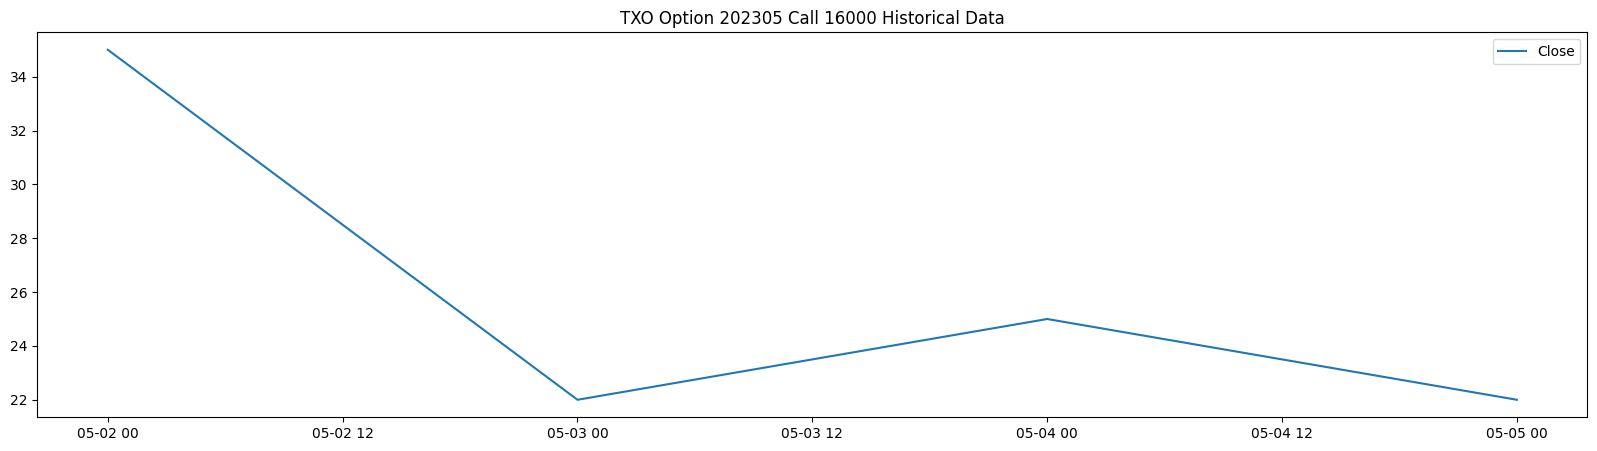

In [20]:
fig = plt.figure(figsize = (20, 5))
plt.title('TXO Option 202305 Call 16000 Historical Data')

plt.plot(txo_16000_c['交易日期'], txo_16000_c['收盤價'])

plt.legend(['Close'])

### 用plotly套件：畫出選擇權202108W2各履約價走勢圖

In [22]:
# Initialize figure with subplots
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("買權", "賣權")
)

# Add traces
fig.add_trace(go.Scatter(x = txo_15900_c["交易日期"], y = txo_15900_c["收盤價"], name = "買權17400"), row=1, col=1)
fig.add_trace(go.Scatter(x = txo_16000_c["交易日期"], y = txo_16000_c["收盤價"], name = "買權17500"), row=2, col=1)
fig.add_trace(go.Scatter(x = txo_16100_c["交易日期"], y = txo_16100_c["收盤價"], name = "買權17600"), row=3, col=1)
fig.add_trace(go.Scatter(x = txo_16200_c["交易日期"], y = txo_16200_c["收盤價"], name = "買權17700"), row=4, col=1)

fig.add_trace(go.Scatter(x = txo_15900_p["交易日期"], y = txo_15900_p["收盤價"], name = "賣權17400"), row=1, col=2)
fig.add_trace(go.Scatter(x = txo_16000_p["交易日期"], y = txo_16000_p["收盤價"], name = "賣權17500"), row=2, col=2)
fig.add_trace(go.Scatter(x = txo_16100_p["交易日期"], y = txo_16100_p["收盤價"], name = "賣權17600"), row=3, col=2)
fig.add_trace(go.Scatter(x = txo_16200_p["交易日期"], y = txo_16200_p["收盤價"], name = "賣權17700"), row=4, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="15900", row=1, col=2)
fig.update_yaxes(title_text="16000", row=2, col=2)
fig.update_yaxes(title_text="16100", row=3, col=2)
fig.update_yaxes(title_text="16200", row=4, col=2)

# Update title and height
fig.update_layout(title_text="台指選 每日交易行情 - 202305", width = 1000, height=2000)

fig.show()